In [66]:
import pandas as pd 
import numpy as np 
from numpy import linspace
import seaborn as sns

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [39]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv")
df

,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405,outcome_type
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121355,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121356,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121357,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121358,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x_input = df.iloc[: , :-1]
x_input

,crime_year_2019,crime_year_2020,crime_year_2021,crime_year_2022,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,LSOA_code_E01033727,LSOA_code_W01000359,LSOA_code_W01000446,LSOA_code_W01000728,LSOA_code_W01000887,LSOA_code_W01000941,LSOA_code_W01000959,LSOA_code_W01000960,LSOA_code_W01001061,LSOA_code_W01001405
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121355,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121356,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121357,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121358,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df["outcome_type"]
y

0         1
1         0
2         1
3         0
4         0
         ..
121355    0
121356    0
121357    0
121358    0
121359    0
Name: outcome_type, Length: 121360, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [43]:
y_train.value_counts()

0    78430
1    18658
Name: outcome_type, dtype: int64

In [44]:
y_test.value_counts()

0    19608
1     4664
Name: outcome_type, dtype: int64

In [ ]:
col_to_scale = ['LSOA_code']

scaler = MinMaxScaler()
x_train[col_to_scale] = scaler.fit_transform(x_train[col_to_scale])

In [ ]:
x_test[col_to_scale] = scaler.fit_transform(x_test[col_to_scale])

In [20]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
col_scale = ["LSOA_code"]
# fit scaler on data
scaler.fit(x_train)
# apply transform
x_train = scaler.transform(x_train)
x_train

array([[0.6835443 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75189873, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.8978903 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.53670886, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.40759494, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36202532, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
x_test = scaler.transform(x_test)

In [45]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight="balanced")
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [46]:
y_pred = dct.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[14059  5549]
 [ 2049  2615]]


In [49]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linspace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.20263157894736844, 1: 0.7973684210526315}}


In [75]:
dct = DecisionTreeClassifier(criterion="gini", max_depth=3, 
class_weight={0: 0.20263157894736844, 1: 0.7973684210526315})
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.20263157894736844,
                                     1: 0.7973684210526315},
                       max_depth=3)

In [77]:
y_pred = dct.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15277  4331]
 [ 2288  2376]]


In [79]:
f1_score(y_test, y_pred)

0.41790519743206406

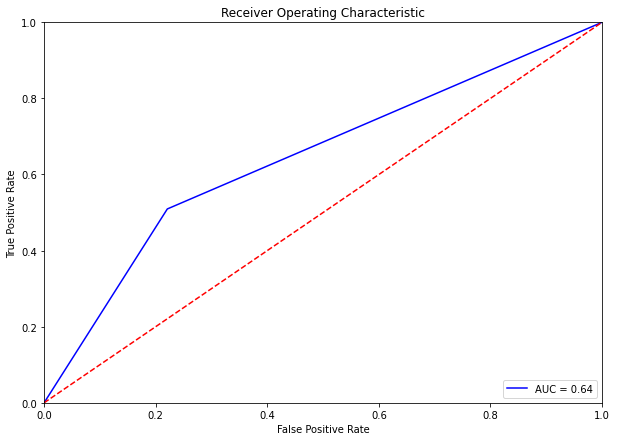

In [81]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

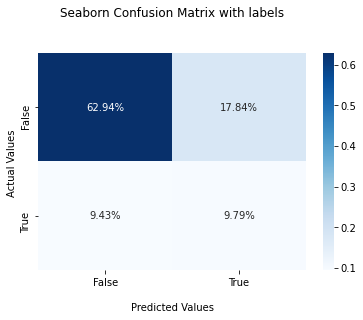

In [80]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19608
           1       0.39      0.41      0.40      4664

    accuracy                           0.76     24272
   macro avg       0.62      0.63      0.63     24272
weighted avg       0.77      0.76      0.77     24272



In [69]:
clf_rf = RandomForestClassifier(n_estimators=5, class_weight="balanced")
clf_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=5)

In [72]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16427  3181]
 [ 2698  1966]]


In [73]:
f1_score(y_test, y_pred)

0.40077464070940777

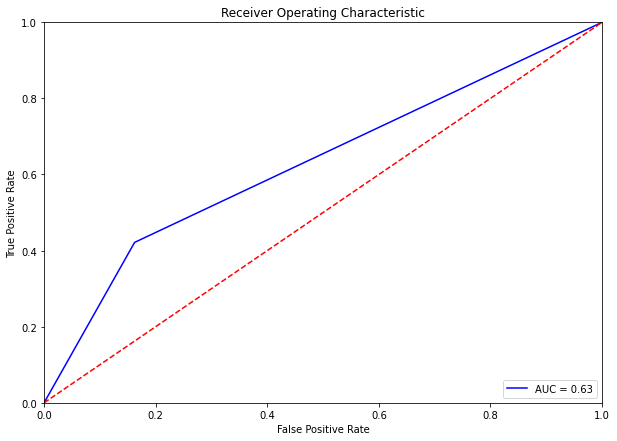

In [74]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            "solver":["saga","lbfgs"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(max_depth=5),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False, boosting='gbdt', eval_metric='logloss'),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.2, .3, .4],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [84]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_metrics

In [34]:
df_metrics

,model,best_score,best_params
0,svm,0.165146,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.358509,{'n_estimators': 10}
2,logistic_regression,0.173749,"{'C': 10, 'solver': 'saga'}"
3,naive_bayes_gaussian,NaN,{}
4,decision_tree,0.165153,{'criterion': 'gini'}
5,XGBClassifier,0.184252,"{'colsample_bytree': 0.7, 'learning_rate': 0.4..."


In [35]:
df_metrics.to_csv(path_or_buf="D:/ADSP/Hertfordshire-Constabulary/data/df_metrics_onehot.csv", index=False)

SmoteTomek

os = SMOTETomek(sampling_strategy = 0.9)
x_train_ns, y_train_ns = os.fit_resample(x_train, y_train)
print(f"The number of classes before fit {Counter(y_train)}")
print(f"The number of classes after fit {Counter(y_train_ns)}")

In [ ]:
x_train_ns